In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd,os

In [2]:
log_dir = '../../Adversarial Heart Sound Results/logs/'
metrics = ['val_macc','val_F1','val_precision','val_sensitivity','val_specificity']

In [3]:
class Results():
    def __init__(self,log_name):
        self.log_name = log_name 
        self.df = None
        self.dft = None # Tuned result
        self.tune = False
        self.log_dir = '../../Adversarial Heart Sound Results/logs/'
        self.metrics = ['val_macc','val_F1','val_precision','val_sensitivity','val_specificity']
        self.read()
    def read(self):
        os.listdir(self.log_dir)
        wow = [x for x in os.listdir(self.log_dir) if self.log_name in x]
        how = [x.split(' ')[0] for x in wow]
        now = list(set(how))
        now.sort()
        print("Log not tuned " ,wow[how.index(now[0])])
        self.df = pd.read_csv(self.log_dir+wow[how.index(now[0])]+'/training.csv')
        self.df.sort_values(by=['val_macc','val_F1'],ascending=False,inplace = True)
        self.df = dict(self.df.iloc[0][self.metrics])
        if(len(now)>1):
            print("Tuned log ",wow[how.index(now[1])])
            self.dft = pd.read_csv(self.log_dir+wow[how.index(now[1])]+'/training.csv')
            self.dft.sort_values(by=['val_macc','val_F1'],ascending=False,inplace = True)
            self.dft = dict(self.dft.iloc[0][self.metrics])
            self.tune = True
    def show(self,width = 0.35,figsize=(8,5)):
        x = np.arange(len(self.metrics))
        fig, ax = plt.subplots(figsize=figsize)
        labels = list(self.df.values())
        rect1 = ax.bar(x-width/2,labels,width,label='Results')
        self.autolabel(rect1,ax)
        title = "Trainer: " +self.log_name.split('_')[0]+"\n Tester: "+ self.log_name.split('_')[1]
        if(self.tune):
            labels2 = list(self.dft.values())
            rect2 = ax.bar(x+width/2,labels2,width,label='Tuned')
            self.autolabel(rect2,ax)
            title = title + "\nWith Tuning"
        ax.set_ylabel('Scores')
        ax.set_xticks(x)
        ax.set_title(title)
        ax.set_xticklabels(self.metrics)
        ax.legend()
        fig.tight_layout()
        plt.show()
        
    def autolabel(self,rects,ax):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.2f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

In [4]:
"""class to hold single Result"""
class Result():
    def __init__(self,log,dann=False):
        self.log_dir = '../../Adversarial Heart Sound Results/logs/'
        self.metrics = ['val_macc','val_F1','val_precision','val_sensitivity','val_specificity']
        self.log_name = log.split(' ')[0]
        if(dann):
            self.log_dir = self.log_dir+'dann/'
            self.log_name = self.log_name + " dann"
        self.trainer = self.log_name.split('_')[0]
        self.tester = self.log_name.split('_')[1]
        self.df = pd.read_csv(self.log_dir+log+'/training.csv')
        self.df.sort_values(by=['val_macc','val_F1'],ascending=False,inplace = True)
        self.df = dict(self.df.iloc[0][self.metrics])

In [5]:
plot_number = 5
np.arange(-(plot_number-1)/2,(plot_number-1)/2+1,1)

array([-2., -1.,  0.,  1.,  2.])

In [6]:
class ResultsComparison():
    def __init__(self,logs,logs_dann=None):
        if(logs_dann is not None):
            self.log_dir_dann = '../../Adversarial Heart Sound Results/logs/dann/'
        self.log_dir = '../../Adversarial Heart Sound Results/logs/'
        self.metrics = ['val_macc','val_F1','val_precision','val_sensitivity','val_specificity']
        self.logs = logs
        self.logs_dann = logs_dann
        self.data = []
        self.read()
    def read(self):
        self.data = [Result(l) for l in self.logs]
        self.data = self.data+[Result(l,True) for l in self.logs_dann]
    def show(self,width = 0.35,figsize=(8,5)):
        x = np.arange(len(self.metrics))
        print(x)
        fig, ax = plt.subplots(figsize=figsize)
        plot_number = len(self.data)
        width = .8/plot_number
        idx = np.arange(-(plot_number-1)/2,(plot_number-1)/2+1,1)
        for i,d in enumerate(self.data):
            print(d.log_name)
            labels = list(d.df.values())
            rect1 = ax.bar(x+idx[i]*width,labels,width,label=d.log_name)
            self.autolabel(rect1,ax)
            #self.autolabel(rect1,ax)
        ax.set_xticks(x)
        ax.set_title("Orre kop ")
        ax.set_xticklabels(self.metrics)
        ax.legend()
        fig.tight_layout()
        plt.show()
    def autolabel(self,rects,ax):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.2f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

4
[0 1 2 3 4]
[-1.5 -0.5  0.5  1.5]
abcdefgh_i_tune_0.3
abdfi_c
abdf_c
abdf_c_tune_0.3


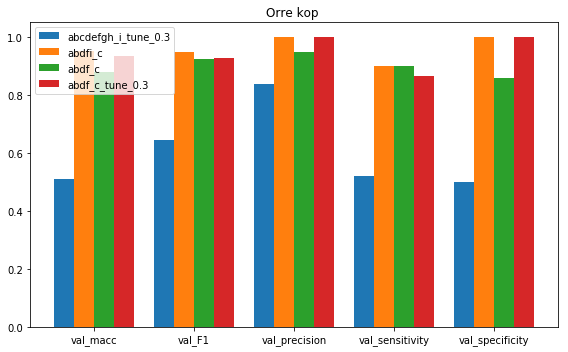

In [104]:
a = ResultsComparison([x for x in os.listdir(log_dir)][:4])
len(a.data)
a.show()

In [15]:
#### Show all log names 
[x.split(' ')[0] for x in os.listdir(log_dir)]

['abcdefgh_i_tune_0.3 Tuned 30 2019-09-26 14:24:11.245075',
 'abdfi_c 2019-09-24 12:51:14.116640',
 'abdf_c 2019-09-23 13:38:14.925635',
 'abdf_c_tune_0.3 Tuned 30 2019-09-25 18:23:15.679809',
 'bcdfghi_a 2019-09-24 22:26:47.695625',
 'bcdfghi_a asdfasdfasfdasdfds',
 'bcdfghi_a_tune_0.3 Tuned 30 2019-09-25 11:46:30.180240',
 'bcdfi_a 2019-09-24 18:10:56.540917',
 'bcdf_a 2019-09-24 17:02:30.673090',
 'dann']

In [20]:
log_dir = '../../Adversarial Heart Sound Results/logs/'

In [21]:
fold = ['abcdef 2019-11-12 13:25:37.761305','abcdef 2019-11-11 15:19:29.468348']

In [36]:
def lossplot(fold,figsize=None):
    filepath = [os.path.join(r,fold,'training.csv') for r,d,f in os.walk(log_dir) if fold in d][0]
    if(os.path.isfile(filepath)):
        df = pd.read_csv(filepath)
        df.sort_values(by='epoch',ascending=True,inplace = True)
        if(figsize is not None):
            plt.figure(figsize=figsize)
        fig = plt.plot(df['class_loss'])
        fig = plt.plot(df['val_class_loss'])
        print(filepath)
        df.sort_values(by='val_macc',ascending=False,inplace = True)
        print('max macc',(df.iloc[0]['val_macc']))
        print('train acc', (df.iloc[0]['class_acc']))
        print('val acc', (df.iloc[0]['val_class_acc']))
        print('val_sensitivity', (df.iloc[0]['val_sensitivity']))
        print('val_specificity', (df.iloc[0]['val_specificity']))
        print('val_precision', (df.iloc[0]['val_precision']))

../../Adversarial Heart Sound Results/logs/self_train/unbalanced/abcdef 2019-11-12 13:25:37.761305/training.csv
max macc 0.6895598274686148
train acc 0.7908948356469893
val acc 0.7166343181219557
val_sensitivity 0.8325358413497882
val_specificity 0.5465838135874413
val_precision 0.7044534099231274


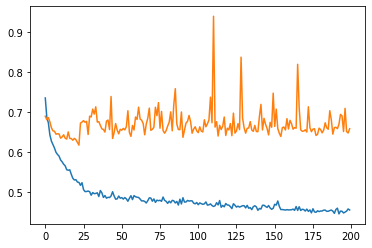

In [37]:
lossplot(fold[0]) ## un balanced

../../Adversarial Heart Sound Results/logs/self_train/abcdef 2019-11-11 15:19:29.468348/training.csv
max macc 0.6258135099093268
train acc 0.7869288101082756
val acc 0.6560109538470711
val_sensitivity 0.8851674175270737
val_specificity 0.36645960229158
val_precision 0.6445992784299929


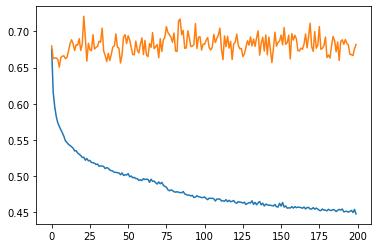

In [38]:
lossplot(fold[1])

../../Adversarial Heart Sound Results/logs/HeartSegNet/self_train/abcdef 2019-11-12 14:59:04.900329/training.csv
max macc 0.6701238862253174
train acc 0.7656371398614004
val acc 0.5968717861725378
val_sensitivity 0.7129186227650486
val_specificity 0.6273291496855861
val_precision 0.7129186227650486


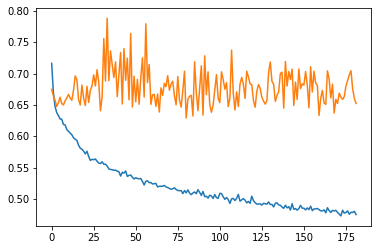

In [39]:
lossplot('abcdef 2019-11-12 14:59:04.900329')

../../Adversarial Heart Sound Results/logs/HeartSegNet/self_train/abcdef 2019-11-12 16:16:50.270064/training.csv
max macc 0.6124252970943852
train acc 0.7070707071285981
val acc 0.6701678252407971
val_sensitivity 0.870813351296905
val_specificity 0.3540372428918654
val_precision 0.6363636118881129


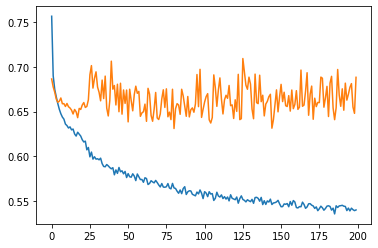

In [40]:
lossplot('abcdef 2019-11-12 16:16:50.270064')

../../Adversarial Heart Sound Results/logs/SmallNet/self_train/abcdef 2019-11-12 17:07:14.590340/training.csv
max macc 0.6943445162120043
train acc 0.7902097839575547
val acc 0.7029341285407563
val_sensitivity 0.8421052188365674
val_specificity 0.5465838135874413
val_precision 0.7068272780116464


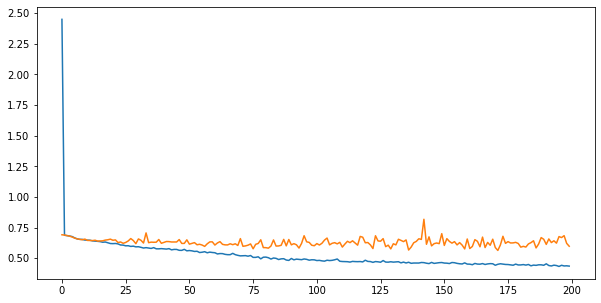

In [41]:
lossplot('abcdef 2019-11-12 17:07:14.590340',figsize=(10,5))  ## Small net

In [42]:
(0.9999998720930396+0.776119275562507)/2

0.8880595738277733

../../Adversarial Heart Sound Results/logs/SmallNet/self_train/a 2019-11-17 14:13:36.866226/training.csv
max macc 0.610017763633125
train acc 0.8568269266532018
val acc 0.5939799305986002
val_sensitivity 0.6046510854516054
val_specificity 0.6153844418146446
val_precision 0.776119275562507


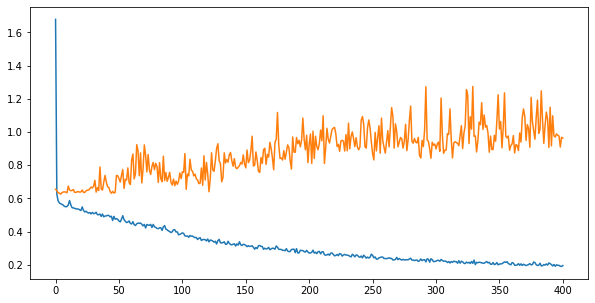

In [45]:
lossplot('a 2019-11-17 14:13:36.866226',figsize=(10,5))  ## Small net

../../Adversarial Heart Sound Results/logs/SmallNet/self_train/a 2500sam 400 2019-11-17 16:41:56.211152/training.csv
max macc 0.5961662365556609
train acc 0.7810416693488756
val acc 0.6755987614188286
val_sensitivity 0.8765430908398272
val_specificity 0.3157893822714946
val_precision 0.7319586798809744


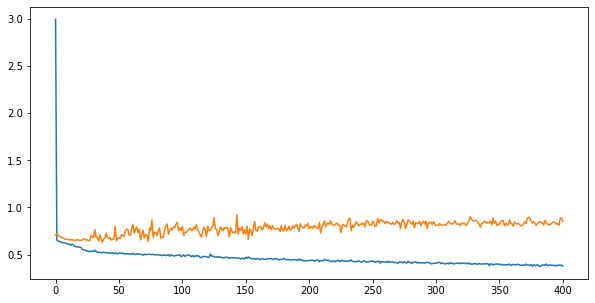

In [46]:
lossplot('a 2500sam 400 2019-11-17 16:41:56.211152',figsize=(10,5))

../../Adversarial Heart Sound Results/logs/SmallNet/self_train/a 2500sam 200 2019-11-17 19:18:28.858927/training.csv
max macc 0.6154969661515259
train acc 0.8097959160804749
val acc 0.6668247518496037
val_sensitivity 0.8888887681755994
val_specificity 0.3421051641274525
val_precision 0.7422679570623966


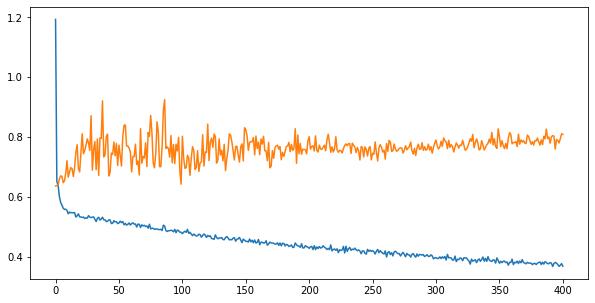

In [49]:
hm = 'a 2500sam 200 2019-11-17 19:18:28.858927'
lossplot(hm, figsize=(10,5))

../../Adversarial Heart Sound Results/logs/SmallNet/self_train/a repeated 400 2019-11-17 17:53:00.231328/training.csv
max macc 0.5948120469986176
train acc 0.8416346105245444
val acc 0.5756967691341238
val_sensitivity 0.6511627074094212
val_specificity 0.5384613865878141
val_precision 0.7567566442659043


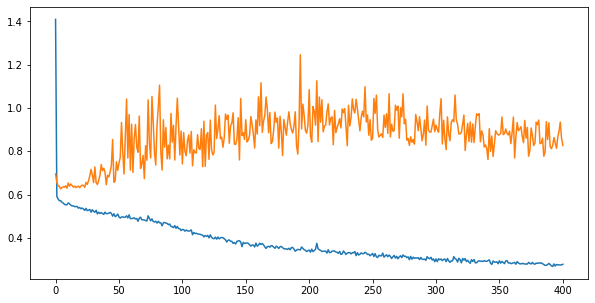

In [47]:
hm = 'a repeated 400 2019-11-17 17:53:00.231328'
lossplot(hm, figsize=(10,5))